In [1]:
import pandas as pd
import sqlite3

In [2]:
database_path = '../historical_time_series.db'

In [3]:
def load_data(ticker, table_name='stock_data'):
    with sqlite3.connect(database_path) as conn:
        query = f"SELECT * FROM {table_name} WHERE ticker = '{ticker}'"
        df = pd.read_sql_query(query, conn)
    return df

In [4]:
def get_symbols(table_name='stock_data'):
    with sqlite3.connect(database_path) as conn:
        symbols = pd.read_sql_query(f"SELECT DISTINCT ticker FROM {table_name}", conn)
    return symbols['ticker'].tolist()

def get_date_range(ticker, table_name='stock_data'):
    with sqlite3.connect(database_path) as conn:
        query = f"SELECT MIN(timestamp) as start_date, MAX(timestamp) as end_date FROM {table_name} WHERE ticker = '{ticker}'"
        date_range = pd.read_sql_query(query, conn)
    return date_range.iloc[0]

In [5]:
table_name = 'crypto_data_hourly' # stock_data is the default table name
symbol = 'X:BTCUSD' # Example for Apple Inc.
# Get list of symbols
symbols = get_symbols(table_name=table_name) # stock_data is the default table name
print(symbols)

# Get date range for a specific symbol
date_range = get_date_range(symbol, table_name=table_name)  # Example for Apple Inc.
print(date_range)

# Load data into DataFrame for visualization
df = load_data(symbol, table_name=table_name)  # Example for Apple Inc.


['X:BTCUSD']
start_date    2020-09-21 00:00:00
end_date      2024-01-04 13:00:00
Name: 0, dtype: object


In [6]:
date_range[0]

C:\Users\JoeBa\AppData\Local\Temp\ipykernel_24136\40090645.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  date_range[0]


'2020-09-21 00:00:00'

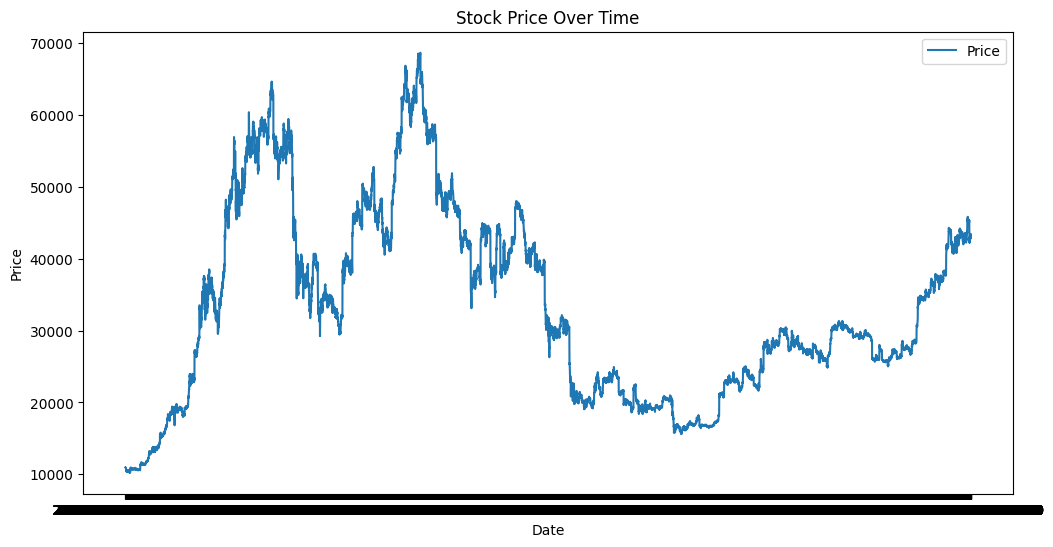

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], label='Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Over Time')
plt.legend()
plt.show()


In [8]:
df.head()

,ticker,timestamp,volume,price
0,X:BTCUSD,2020-09-21 00:00:00,973.565666,10958.31
1,X:BTCUSD,2020-09-21 01:00:00,1112.925298,10943.93
2,X:BTCUSD,2020-09-21 02:00:00,1215.928718,10944.92
3,X:BTCUSD,2020-09-21 03:00:00,959.498934,10965.70
4,X:BTCUSD,2020-09-21 04:00:00,1245.987056,10960.12


In [9]:
df.tail()

,ticker,timestamp,volume,price
14222,X:BTCUSD,2024-01-04 09:00:00,532.926731,43048.96
14223,X:BTCUSD,2024-01-04 10:00:00,864.259556,43121.14
14224,X:BTCUSD,2024-01-04 11:00:00,759.574538,43226.07
14225,X:BTCUSD,2024-01-04 12:00:00,1313.229903,43430.62
14226,X:BTCUSD,2024-01-04 13:00:00,193.995202,43318.00
